In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import plotly.express as px

plt.style.use('ggplot')

In [38]:
#Read the master data
df = pd.read_csv("D:\Projects\Data_Glacier_Virtual_Internship\Week_10\master_data.csv")

### Step 1: Data Understanding

* Dataframe shape
* head and tail
* dtypes
* describe

In [39]:
df.shape

(87, 11)

In [40]:
df.head()

,Unnamed: 0,Name,Email,Age,Country,Education Level,Number of Languages Spoken,Gender,Satisfaction Rate,Marital Status,Number of Children
0,0,Landon Patel,landonpatel@gmail.com,32,United States,Bachelor's Degree,2,Male,8,Single,3
1,1,Cassidy Turner,cassidyturner@yahoo.com,24,Canada,Master's Degree,1,Non-binary,9,Married,4
2,2,Axl Thompson,axl.thompson@hotmail.com,43,United States,High School,3,Male,7,Single,1
3,3,Ivy Wilson,ivywilson@gmail.com,58,United Kingdom,Bachelor's Degree,4,Female,6,Divorced,0
4,4,Reece Scott,reece.scott@outlook.com,26,Australia,Doctorate,4,Male,4,Married,2


In [41]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
df.dtypes

Name                          object
Email                         object
Age                            int64
Country                       object
Education Level               object
Number of Languages Spoken     int64
Gender                        object
Satisfaction Rate              int64
Marital Status                object
Number of Children             int64
dtype: object

In [43]:
df.describe()

,Age,Number of Languages Spoken,Satisfaction Rate,Number of Children
count,87.000000,87.000000,87.000000,87.000000
mean,40.195402,2.310345,5.781609,1.862069
std,13.479389,1.164498,2.656389,1.431964
min,20.000000,1.000000,1.000000,0.000000
25%,28.500000,1.000000,4.000000,1.000000
50%,40.000000,2.000000,6.000000,2.000000
75%,51.500000,3.000000,8.000000,3.000000
max,61.000000,4.000000,10.000000,4.000000


### Step 2: Feature Understanding
(Univariate analysis)

Plotting Feature Distributions
* Histogram
* KDE
* Boxplot

Text(0, 0.5, 'Count')

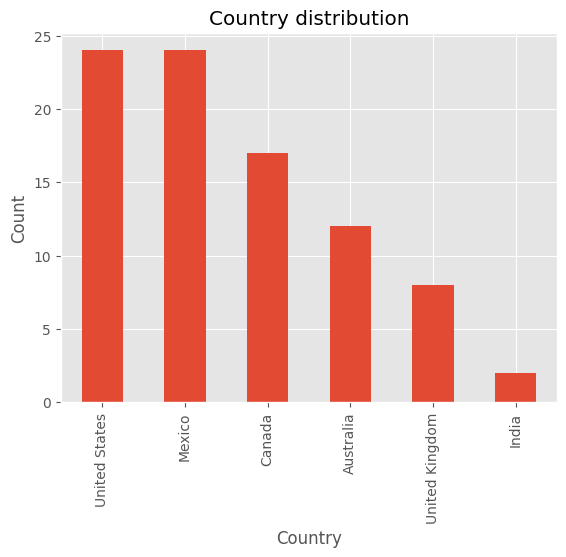

In [44]:
ax = df['Country'].value_counts().plot(kind='bar', title='Country distribution')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

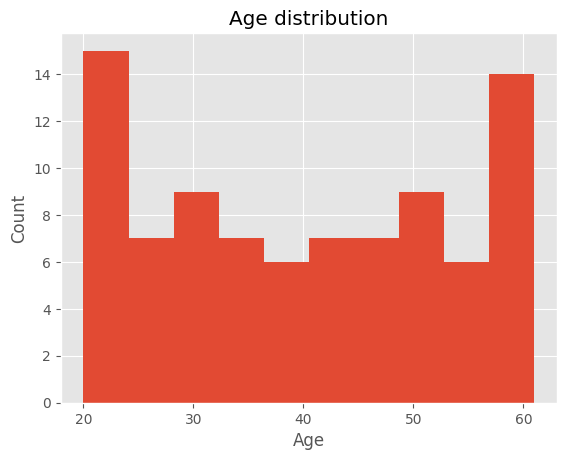

In [45]:
# Visualize the distribution of numerical variables
ax = df['Age'].plot(kind='hist', title='Age distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

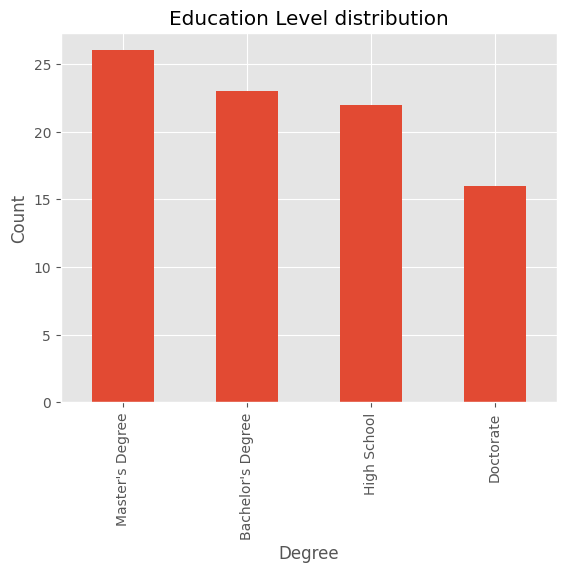

In [48]:
# Visualize the distribution of categorical variables
ax = df['Education Level'].value_counts().plot(kind='bar', title='Education Level distribution')
ax.set_xlabel('Degree')
ax.set_ylabel('Count')

### Step 3: Feature Relationships

                                 Age  Number of Languages Spoken  \
Age                         1.000000                    0.121285   
Number of Languages Spoken  0.121285                    1.000000   
Satisfaction Rate           0.069402                   -0.090605   
Number of Children         -0.084733                   -0.078629   

                            Satisfaction Rate  Number of Children  
Age                                  0.069402           -0.084733  
Number of Languages Spoken          -0.090605           -0.078629  
Satisfaction Rate                    1.000000           -0.023295  
Number of Children                  -0.023295            1.000000  
Marital Status  Divorced  Married  Single
Gender                                   
Female                 7       21      16
Male                   9       19      14
Non-binary             0        1       0


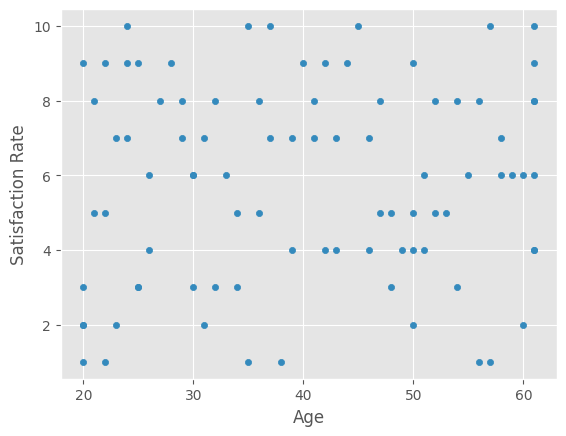

In [49]:
# Create a correlation matrix for numerical variables
correlation_matrix = df[['Age', 'Number of Languages Spoken', 'Satisfaction Rate', 'Number of Children']].corr()
print(correlation_matrix)

# Visualize the relationship between two numerical variables
df.plot.scatter(x='Age', y='Satisfaction Rate')

# Crosstabulation of two categorical variables
cross_tab = pd.crosstab(df['Gender'], df['Marital Status'])
print(cross_tab)


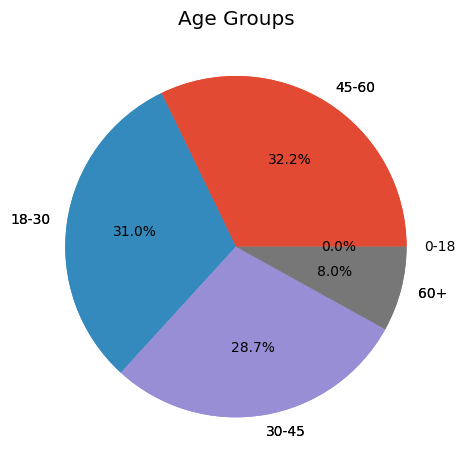

In [65]:
# Derive a new feature 'Age Group' from 'Age'
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, float('inf')], labels=['0-18', '18-30', '30-45', '45-60', '60+'])

# Create various visualizations to summarize findings
ax = df['Age Group'].value_counts().plot(kind='pie', title='Age Groups', )
ax.set_ylabel('')

# Plotting the pie chart
plt.pie(df['Age Group'].value_counts(), 
        labels=df['Age Group'].value_counts().index, autopct='%1.1f%%')

# Adding numbers on the pie chart
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
plt.tight_layout()  # Adjusts the padding and spacing
plt.show()

<Axes: xlabel='Number of Languages Spoken', ylabel='Satisfaction Rate'>

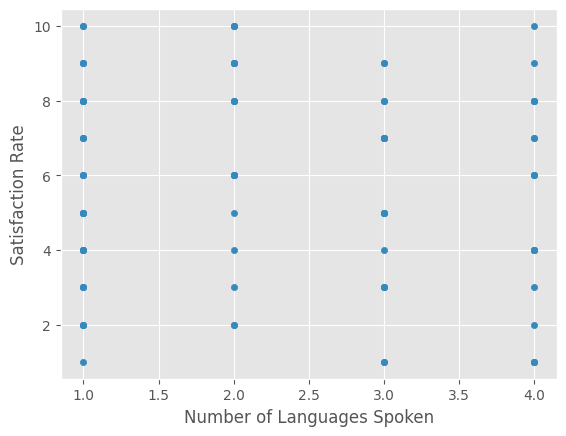

In [52]:
df.plot.scatter(x='Number of Languages Spoken', y='Satisfaction Rate')